In [1]:
!pip install missingno

  Obtaining dependency information for missingno from https://files.pythonhosted.org/packages/87/22/cd5cf999af21c2f97486622c551ac3d07361ced8125121e907f588ff5f24/missingno-0.5.2-py3-none-any.whl.metadata


In [1]:
import webbrowser
import tkinter as tk
from tkinter import filedialog
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
import numpy as np

In [2]:
# Выгрузка из 1С: Бухгалтерия предприятия 2.0 >>>
# Журнал проводок.
url="https://audit-soft.ru/help/audit/source-data/excel-unload-1c2"
webbrowser.open(url)

True

In [3]:
# missing data visualizations >>>
url="https://github.com/ResidentMario/missingno"
webbrowser.open(url)

True

In [4]:
# initializing tcl/tk interpreter >>
window = tk.Tk()
# open filedialog window on top of other windows >>
window.wm_attributes('-topmost', 1)
# this will close empty tk-window after filedialog >>
window.withdraw()

''

In [14]:
# get file name & read data >>
fileName = filedialog.askopenfilename(title="Select file",
                    filetypes=(("Excel files", "*.xlsx"),
                               ("All files", "*.*")),
                    parent=window)
df = pd.read_excel(fileName)
print('\n', df)


       a     b     c    d     e   f
0  10.0  20.0  30.0  NaN   NaN NaN
1   NaN  11.0   NaN  NaN  55.0 NaN
2   NaN  12.0  14.0  NaN   NaN NaN
3   3.0   4.0   5.0  NaN   NaN NaN
4   NaN   3.0   4.0  1.0   NaN NaN
5   NaN  14.0  22.0  NaN   NaN NaN
6   1.0   2.0   3.0  NaN   NaN NaN
7   NaN   NaN   NaN  NaN   NaN NaN
8   NaN   NaN   NaN  NaN   NaN NaN
9   NaN   7.0   3.0  2.0   NaN NaN


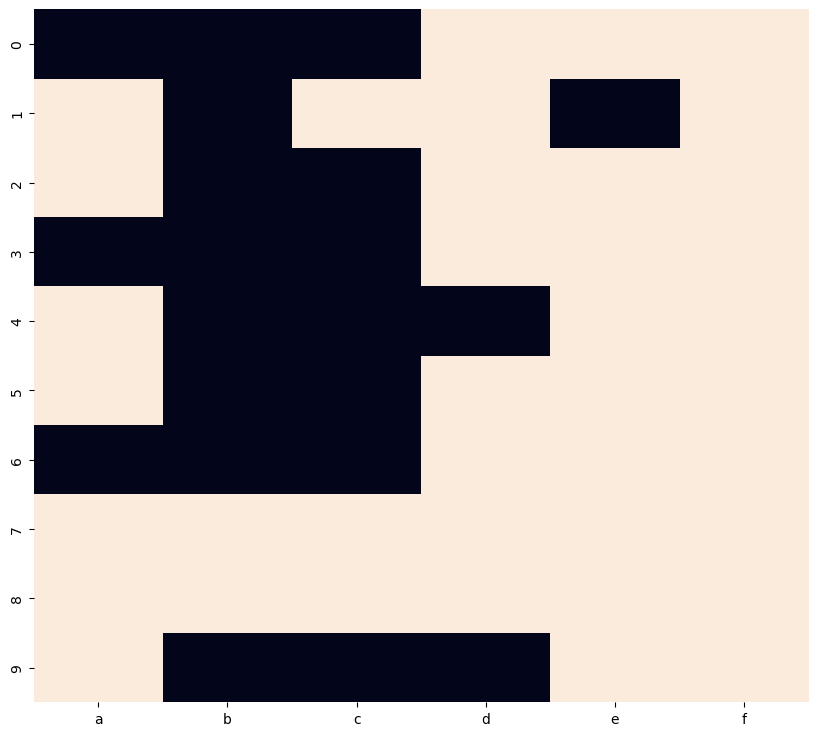

In [15]:
f, ax = plt.subplots(figsize=(10, 9))
ax = sns.heatmap(df.isnull(), cbar=False)

In [16]:
# transpose >>>
df2=df.T


       a     b     c    d     e   f
0  10.0  20.0  30.0  NaN   NaN NaN
1   NaN  11.0   NaN  NaN  55.0 NaN
2   NaN  12.0  14.0  NaN   NaN NaN
3   3.0   4.0   5.0  NaN   NaN NaN
4   NaN   3.0   4.0  1.0   NaN NaN
5   NaN  14.0  22.0  NaN   NaN NaN
6   1.0   2.0   3.0  NaN   NaN NaN
7   NaN   NaN   NaN  NaN   NaN NaN
8   NaN   NaN   NaN  NaN   NaN NaN
9   NaN   7.0   3.0  2.0   NaN NaN


<Axes: >

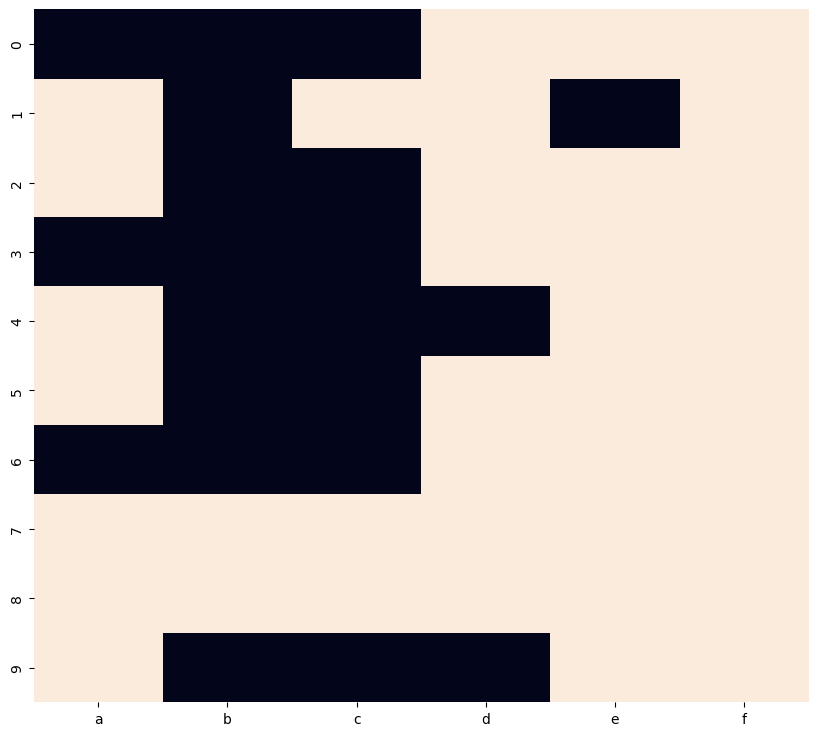

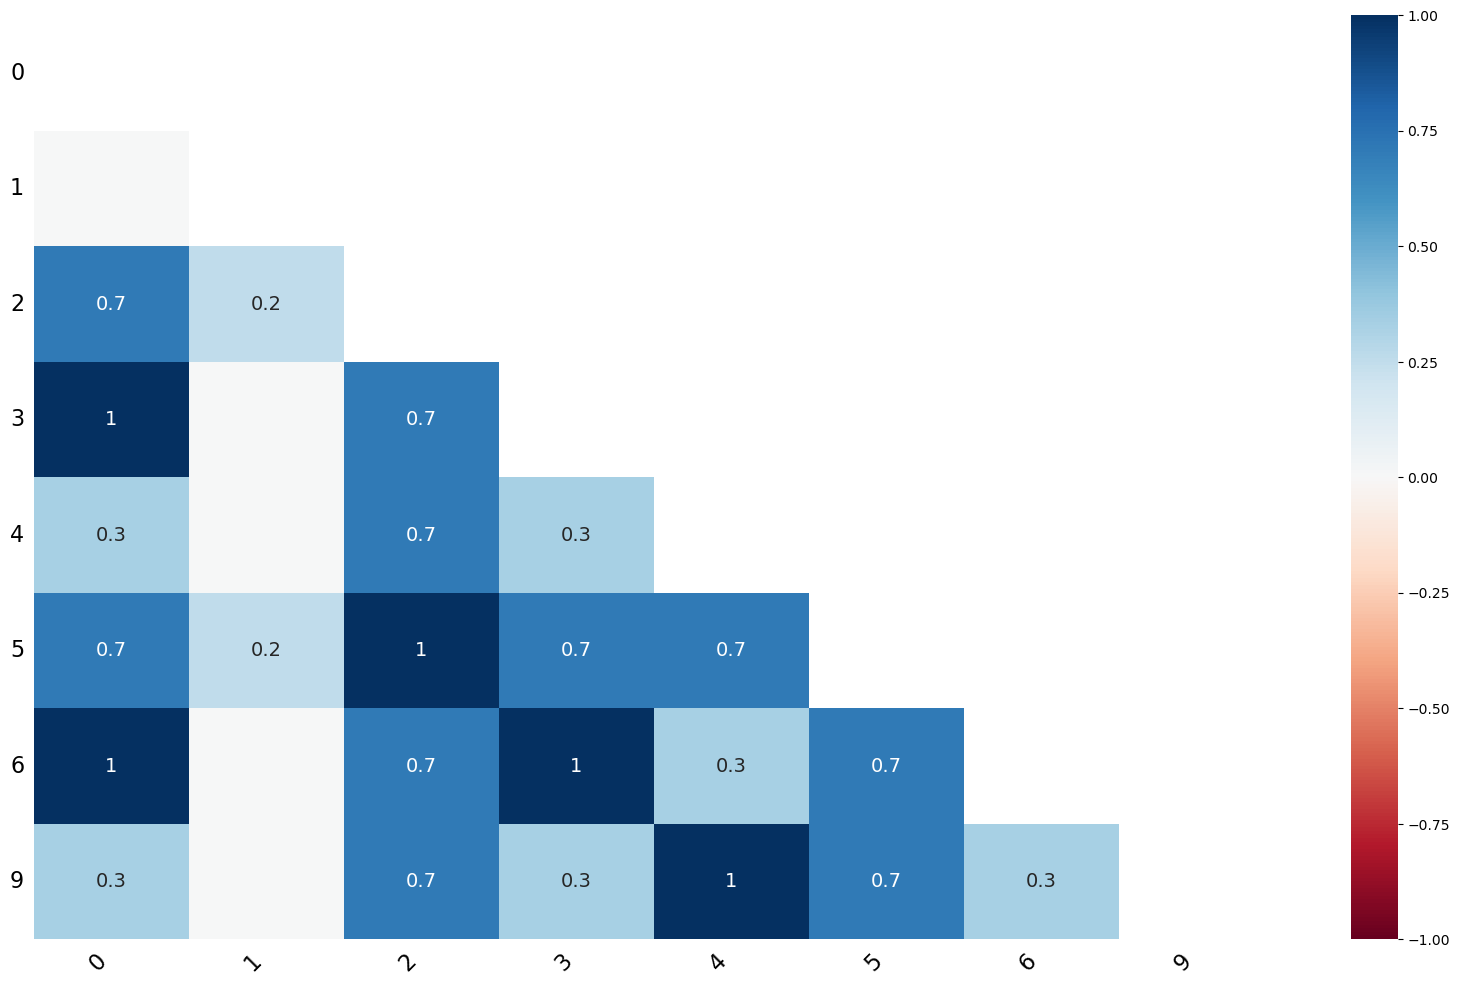

In [17]:
n1=0
n2=25

f, ax = plt.subplots(figsize=(10, 9))
ax = sns.heatmap(df[n1:n2].isnull(), cbar=False)

print('\n', df[n1:n2])
msno.heatmap(df2.loc[:,n1:n2])

In [18]:
## simple by hand >>>
#
url="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.where.html"
webbrowser.open(url)

True

In [19]:
### replace numbers to 1 >>>
s = df.where(df.isnull(), 1)
print('\n', df,'\n', s)


       a     b     c    d     e   f
0  10.0  20.0  30.0  NaN   NaN NaN
1   NaN  11.0   NaN  NaN  55.0 NaN
2   NaN  12.0  14.0  NaN   NaN NaN
3   3.0   4.0   5.0  NaN   NaN NaN
4   NaN   3.0   4.0  1.0   NaN NaN
5   NaN  14.0  22.0  NaN   NaN NaN
6   1.0   2.0   3.0  NaN   NaN NaN
7   NaN   NaN   NaN  NaN   NaN NaN
8   NaN   NaN   NaN  NaN   NaN NaN
9   NaN   7.0   3.0  2.0   NaN NaN 
      a    b    c    d    e   f
0  1.0  1.0  1.0  NaN  NaN NaN
1  NaN  1.0  NaN  NaN  1.0 NaN
2  NaN  1.0  1.0  NaN  NaN NaN
3  1.0  1.0  1.0  NaN  NaN NaN
4  NaN  1.0  1.0  1.0  NaN NaN
5  NaN  1.0  1.0  NaN  NaN NaN
6  1.0  1.0  1.0  NaN  NaN NaN
7  NaN  NaN  NaN  NaN  NaN NaN
8  NaN  NaN  NaN  NaN  NaN NaN
9  NaN  1.0  1.0  1.0  NaN NaN


In [20]:
s.iloc[0]
s.iloc[1]

s.iloc[1].replace(1, np.NaN)

s.iloc[0].equals(s.iloc[1])

s.shape[0]
range(s.shape[0])

s.index

RangeIndex(start=0, stop=10, step=1)

In [21]:
# to exclude rows that have been checked >>>
to_chek = pd.DataFrame(index=s.index, columns=['check'])
to_chek = to_chek.fillna(True)
print(to_chek.T)

          0     1     2     3     4     5     6     7     8     9
check  True  True  True  True  True  True  True  True  True  True


In [22]:
# algorithm with 'to_chek.check' >>>
end = s.shape[0]-1
for i in range(end):
#for i in s[:].T:
#  print('\n', s.iloc[i])
  k=i+1
  p=False
  if to_chek.check[i]:
   for j in s[k:].T:
      if s.iloc[i].equals(s.iloc[j]):
        p=True
        break
   if p:
      print('\nSame entries', k, end=' ')
      for j in s[k:].T:
        if s.iloc[i].equals(s.iloc[j]):
          k2=j+1
          print(k2, end=' ')
          to_chek.check[j]=False
#    print(s.iloc[i].equals(s.iloc[j]))
#  print('\n')


Same entries 1 4 7 
Same entries 3 6 
Same entries 5 10 
Same entries 8 9 

In [23]:
import tkinter as tk
from tkinter import filedialog
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [24]:
# initializing tcl/tk interpreter >>
window = tk.Tk()
# open filedialog window on top of other windows >>
window.wm_attributes('-topmost', 1)
# this will close empty tk-window after filedialog >>
window.withdraw()

''

In [28]:
# get file name & read data >>
fileName = filedialog.askopenfilename(title="Select file",
                    filetypes=(("Excel files", "*.xlsx"),
                               ("All files", "*.*")),
                    parent=window)
df = pd.read_excel(fileName)
print('\n', df)


                  Период  №                                           Документ  \
0   31.12.2012 12:00:00  1  Ввод начальных остатков 00000000001 от 31.12.2...   
1   31.12.2012 12:00:00  2  Ввод начальных остатков 00000000001 от 31.12.2...   
2   31.12.2012 12:00:00  3  Ввод начальных остатков 00000000001 от 31.12.2...   
3   09.01.2013 12:00:00  1  Поступление товаров и услуг 00000000001 от 09....   
4   09.01.2013 12:00:00  2  Поступление товаров и услуг 00000000001 от 09....   
..                  ... ..                                                ...   
93  31.01.2013 12:00:00  4  Поступление товаров и услуг 00000000005 от 31....   
94  31.01.2013 12:00:00  5  Поступление товаров и услуг 00000000005 от 31....   
95  31.01.2013 12:00:00  6  Поступление товаров и услуг 00000000005 от 31....   
96  31.01.2013 12:00:00  7  Поступление товаров и услуг 00000000005 от 31....   
97  31.01.2013 12:00:00  8  Поступление товаров и услуг 00000000005 от 31....   

   Счет Дт               

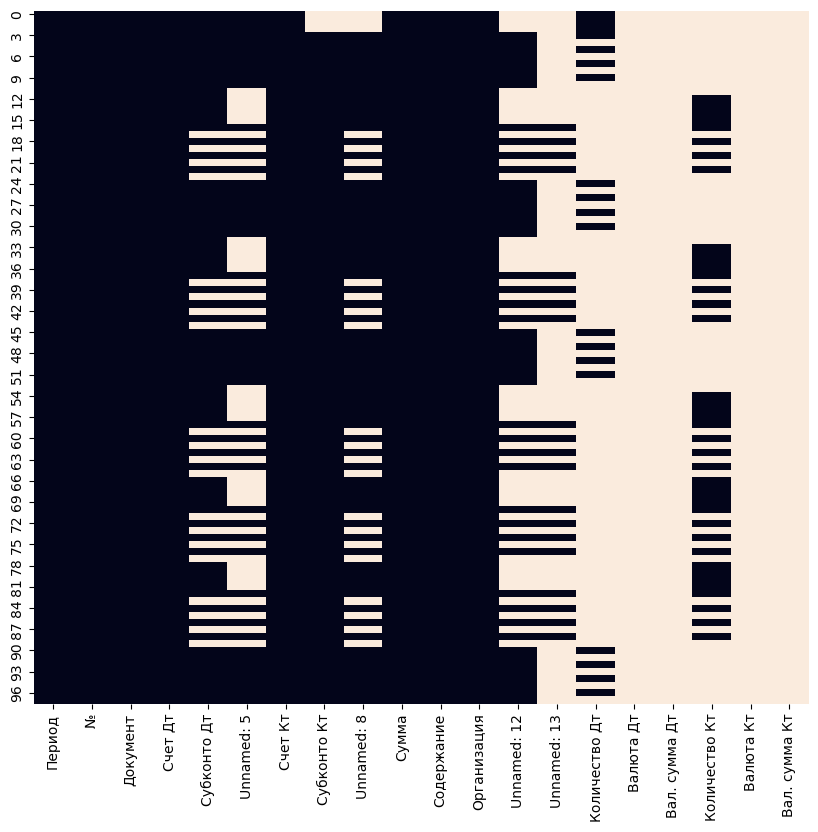

In [29]:
f, ax = plt.subplots(figsize=(10, 9))
ax = sns.heatmap(df.isnull(), cbar=False)

In [30]:
### replace numbers to 1 >>>
s = df.where(df.isnull(),1)
print('\n', df,'\n', s)


                  Период  №                                           Документ  \
0   31.12.2012 12:00:00  1  Ввод начальных остатков 00000000001 от 31.12.2...   
1   31.12.2012 12:00:00  2  Ввод начальных остатков 00000000001 от 31.12.2...   
2   31.12.2012 12:00:00  3  Ввод начальных остатков 00000000001 от 31.12.2...   
3   09.01.2013 12:00:00  1  Поступление товаров и услуг 00000000001 от 09....   
4   09.01.2013 12:00:00  2  Поступление товаров и услуг 00000000001 от 09....   
..                  ... ..                                                ...   
93  31.01.2013 12:00:00  4  Поступление товаров и услуг 00000000005 от 31....   
94  31.01.2013 12:00:00  5  Поступление товаров и услуг 00000000005 от 31....   
95  31.01.2013 12:00:00  6  Поступление товаров и услуг 00000000005 от 31....   
96  31.01.2013 12:00:00  7  Поступление товаров и услуг 00000000005 от 31....   
97  31.01.2013 12:00:00  8  Поступление товаров и услуг 00000000005 от 31....   

   Счет Дт               

In [31]:
# to exclude rows that have been checked >>>
# Fill temporary dataframe with TRUE values.
# Only s rows with TRUE values of 'to_chek' will be checked.
to_chek = pd.DataFrame(index=s.index, columns=['check'])
to_chek = to_chek.fillna(True)
print(to_chek.T)

         0     1     2     3     4     5     6     7     8     9   ...    88  \
check  True  True  True  True  True  True  True  True  True  True  ...  True   

         89    90    91    92    93    94    95    96    97  
check  True  True  True  True  True  True  True  True  True  

[1 rows x 98 columns]


In [32]:
end = s.shape[0]-1
for i in range(end):
  k=i+1
  p=False
  if to_chek.check[i]:
   for j in s[k:].T:
      if s.iloc[i].equals(s.iloc[j]):
        p=True
        break
   if p:
      print('\nSame entries', k, end=' ')
      for j in s[k:].T:
        if s.iloc[i].equals(s.iloc[j]):
          k2=j+1
          print(k2, end=' ')
          to_chek.check[j]=False



Same entries 1 2 3 
Same entries 4 6 8 10 25 27 29 31 46 48 50 52 91 93 95 97 
Same entries 5 7 9 11 26 28 30 32 47 49 51 53 92 94 96 98 
Same entries 12 33 54 
Same entries 13 14 15 16 34 35 36 37 55 56 57 58 67 68 69 70 79 80 81 82 
Same entries 17 19 21 23 38 40 42 44 59 61 63 65 71 73 75 77 83 85 87 89 
Same entries 18 20 22 24 39 41 43 45 60 62 64 66 72 74 76 78 84 86 88 90 